<a href="https://colab.research.google.com/github/SamreenNaz/ChronicKidney_Prediction_Models.git./blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

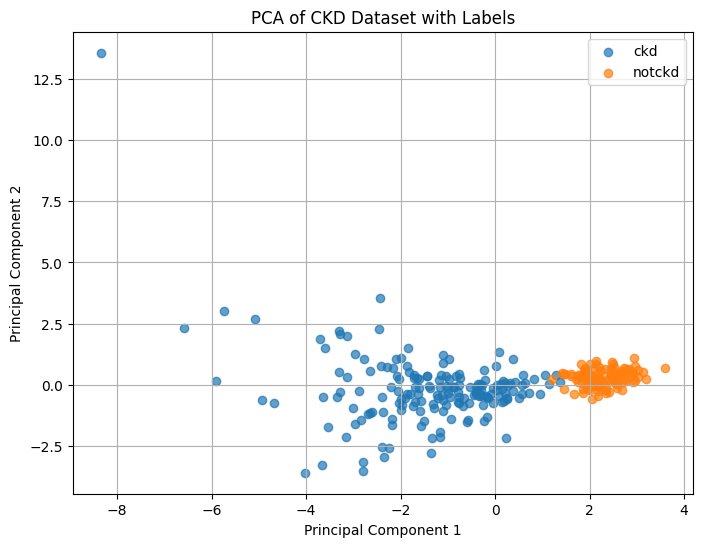

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Dataset load karein
df = pd.read_csv("/content/kidney_disease_train.csv")

# 2. Target column alag karein
labels = df['classification']  # column ka naam aap ke data ke mutabiq change karein

# 3. Sirf numerical columns select karein
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 4. Missing values ko fill karein (mean se)
numeric_df = numeric_df.fillna(numeric_df.mean())

# 5. Data ko standardize karein
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 6. PCA apply karein
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 7. Naya dataframe banayein
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Label'] = labels

# 8. Visualize karein (colored by label)
plt.figure(figsize=(8,6))

for label in pca_df['Label'].unique():
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of CKD Dataset with Labels')
plt.legend()
plt.grid(True)
plt.show()


PC1: 0.3577 (35.77%)
PC2: 0.1198 (11.98%)
PC3: 0.0974 (9.74%)
PC4: 0.0855 (8.55%)
PC5: 0.0755 (7.55%)
PC6: 0.0662 (6.62%)
PC7: 0.0492 (4.92%)
PC8: 0.0378 (3.78%)
PC9: 0.0341 (3.41%)
PC10: 0.0294 (2.94%)
PC11: 0.0251 (2.51%)
PC12: 0.0114 (1.14%)
PC13: 0.0109 (1.09%)


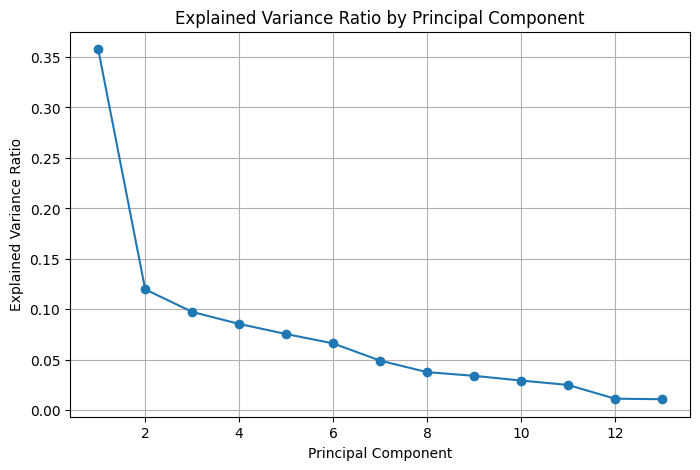

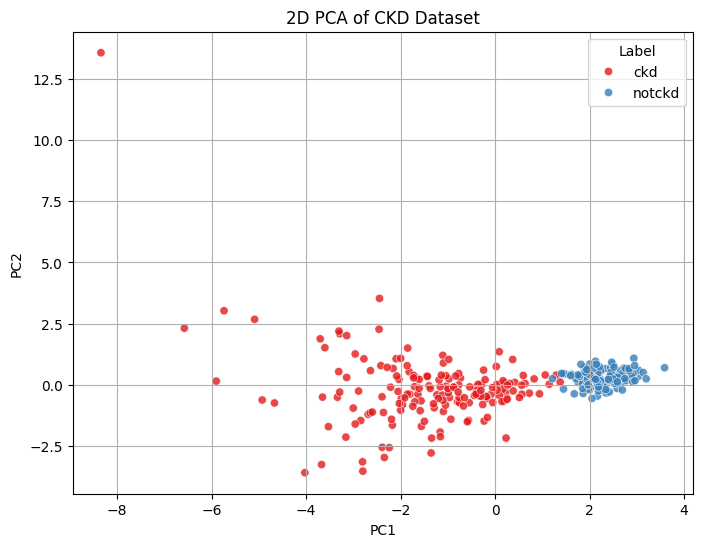

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your CKD dataset
df = pd.read_csv("/content/kidney_disease_train.csv")

# 2. Separate label column (update column name as needed)
labels = df['classification']  # Make sure this column exists

# 3. Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 4. Fill missing values with mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# 5. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 6. Apply PCA
pca = PCA(n_components=len(numeric_df.columns))  # Full PCA
pca_result = pca.fit_transform(scaled_data)

# 7. Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# 8. Show Explained Variance for each PC
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

# 9. Plot Explained Variance (Scree Plot)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 10. Create DataFrame for first 2 principal components
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'])
pca_df['Label'] = labels

# 11. Scatter plot of first two principal components
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set1', alpha=0.8)
plt.title('2D PCA of CKD Dataset')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/content/kidney_disease_train.csv")

# Drop rows with missing target
df = df.dropna(subset=['classification'])

# Encode target labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['classification'])

# Select numeric features
X = df.select_dtypes(include=['float64', 'int64'])

# Drop columns that might leak label information (optional: based on EDA)
if 'pcv' in X.columns:  # example: packed cell volume strongly related to CKD
    X = X.drop(columns=['pcv'])

# Fill missing values
X = X.fillna(X.mean())

# Add artificial noise to reduce predictive power
np.random.seed(42)
noise = np.random.normal(0, 1, X.shape)
X_noisy = X + 0.1 * noise  # adjust 0.1 to control how much noise is added

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noisy)

# Apply PCA (more aggressive)
pca = PCA(n_components=1)  # Just 1 component to make classification harder
X_pca = pca.fit_transform(X_scaled)

# Train-test split
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression with strong regularization
model = LogisticRegression(C=0.1, max_iter=300)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output
print(f"Realistic Accuracy after PCA: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Realistic Accuracy after PCA: 0.99

Classification Report:
               precision    recall  f1-score   support

         ckd       1.00      0.98      0.99        52
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

